In [60]:
# 1i
def sign(x):
    if (x*x) == ((x*x)/x):
        return 1
    elif -(x*x) == ((x*x)/x):
        return -1
    else:
        return 0

#### 1ii
The numpy implementation of sign(x) is much simpler than mine, checking whether x is below, above or equal to 0.

#### 1iii
The argument towards coding function like this yourself is that you gain a better understanding of what your function is actually doing, but the pitfall is that you are likely to overcomplicate or not fully implement the function. Advantages of using NumPy's function would be that it's quicker to implement as you just import NumPy rather than coding it out, and it is more likely to be more efficient code.

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
#2a
def linear_classify(x, theta, theta_0):
    return np.sign(np.dot(np.transpose(theta),x)+theta_0)

In [112]:
#2b
def loss(prediction, actual):
    return abs(prediction-actual)

In [113]:
#2c
def E_n(h, data, labels, L, theta, theta_0):
    (d, n) = data.shape
    total_loss = 0
    for i in range(n):
        x = data[:,i:i+1]
        actual = labels[:,i:i+1]
        prediction = h(x, theta, theta_0)
        total_loss += L(prediction, actual)
    return total_loss/n

In [114]:
#2d
def random_linear_classifier(data, labels, params={}):
    k = params.get('k', 100)
    (d, n) = data.shape
    theta = []
    theta_0 = []
    for j in range(k):
        theta.append(np.random.uniform(-20,20,d))
        theta_0.append(np.random.uniform(-20,20,1))
    errors = []
    for j in range(k):
        errors.append(E_n(linear_classify, data, labels, loss, theta[j], theta_0[j]))
    best = np.argmin(errors)
    return theta[best], theta_0[best]

In [115]:
#2e
def random_linear_classifier(data, labels, params={}, hook=None):
    k = params.get('k', 100)
    (d, n) = data.shape
    theta = []
    theta_0 = []
    for j in range(k):
        theta.append(np.random.uniform(-20,20,d))
        theta_0.append(np.random.uniform(-20,20,1))
    errors = []
    for j in range(k):
        if hook is not None:
            hook((theta[j],theta_0[j]))
        errors.append(E_n(linear_classify, data, labels, loss, theta[j], theta_0[j]))
    best = np.argmin(errors)
    return theta[best], theta_0[best]

In [123]:
#3a
def perceptron(data, labels, params={}, hook=None):
    T = params.get('T', 100)
    (d, n) = data.shape
    theta = np.zeros((d,1))
    theta_0 = 0
    for t in range(T):
        for i in range(n):
            x = data[:, i:i+1]
            y = labels[:, i:i+1]
            if y*(np.dot(np.transpose(theta),x)+theta_0) <= 0:
                theta += y*x
                theta_0 += y
                if hook is not None:
                    hook((theta, theta_0))
    return (theta, theta_0)

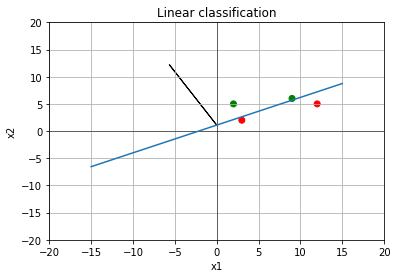

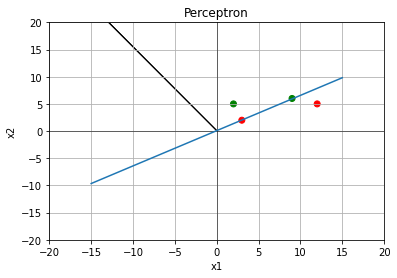

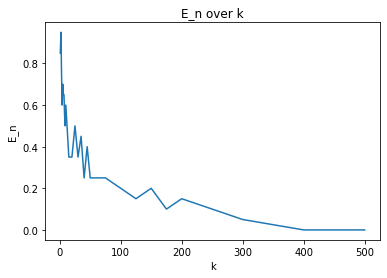

In [126]:
# code provided by module lead to test my code visually
def plot_separator(plot_axes, theta, theta_0):
    y_intercept = -theta_0 / theta[1]
    slope = -theta[0] / theta[1]
    xmin, xmax = -15, 15
    p1_y = slope * xmin + y_intercept
    p2_y = slope * xmax + y_intercept
    plot_axes.plot([xmin, xmax], [p1_y.flatten(), p2_y.flatten()], '-')
    plot_axes.arrow((xmin + xmax) / 2, (p1_y.flatten() + p2_y.flatten()) / 2, float(theta[0]), float(theta[1]))

X = np.array([[2, 3, 9, 12],
                  [5, 2, 6, 5]])
y = np.array([[1, -1, 1, -1]])
colors = np.choose(y > 0, np.transpose(np.array(['r', 'g']))).flatten()
plt.ion()
fig, ax = plt.subplots()
ax.scatter(X[0, :], X[1, :], c=colors, marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.grid(True, which='both')
ax.axhline(color='black', linewidth=0.5)
ax.axvline(color='black', linewidth=0.5)
ax.set_title("Linear classification")

def hook(params):
        (th, th0) = params
        plot_separator(ax, th, th0)
        
theta, theta_0 = random_linear_classifier(X, y, {"k": 100}, hook=None)
plot_separator(ax, theta, theta_0)

fig, ax_per = plt.subplots()
ax_per.scatter(X[0, :], X[1, :], c=colors, marker='o')
ax_per.set_xlabel('x1')
ax_per.set_ylabel('x2')
ax_per.set_xlim(-20, 20)
ax_per.set_ylim(-20, 20)
ax_per.grid(True, which='both')
ax_per.axhline(color='black', linewidth=0.5)
ax_per.axvline(color='black', linewidth=0.5)
ax_per.set_title("Perceptron")

theta, theta_0 = perceptron(X, y, {"T":100}, hook=None)
plot_separator(ax_per, theta, theta_0)

# 2f
k_s = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,125,150,175,200,250,300,400,500]
all_errors = []
for k in k_s:
    all_errors_k = []
    for j in range(10):
        theta, theta_0 = random_linear_classifier(X, y, {"k": k}, hook=None)
        all_errors_k.append(E_n(linear_classify, X, y, loss, theta, theta_0))
    all_errors.append(all_errors_k)
    
fig, ax_err = plt.subplots()
ax_err.set_xlabel('k')
ax_err.set_ylabel('E_n')
ax_err.set_title("E_n over k")
ax_err.plot(k_s,[np.mean(err) for err in all_errors])